In [1]:
# SymPy derivation of fixation probabilities on P3 (1-2-3)
# Temperature-normalized dB; arbitrary r>0 and lambda in [0,1]
# States (rows=from, cols=to): 1:000, 2:001, 3:010, 4:011, 5:100, 6:101, 7:110, 8:111

import sympy as sp

# Symbols
r, lam = sp.symbols('r lam', positive=True)

# ----- Bd one-step matrix PBd (8x8), undirected/unweighted path 1-2-3 -----
PBd = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0, 0],                                                                                 # 000
    [sp.Rational(1,2)/(2+r),  sp.Rational(3,2)/(2+r),                     0,          r/(2+r),                0, 0, 0, 0],  # 001
    [2/(2+r),                 0,                                           0,          r/(2*(2+r)),            0, 0, r/(2*(2+r)), 0],  # 010
    [0,                       1/(1+2*r),                                   0,   (3*r)/(2*(1+2*r)),            0, 0, 0, r/(2*(1+2*r))], # 011
    [sp.Rational(1,2)/(2+r),  0,                                           0,          0,          sp.Rational(3,2)/(2+r), 0, r/(2+r), 0],  # 100
    [0,                       1/(2*(2*r+1)),                               0,          0,          1/(2*(2*r+1)), 0, 0, (2*r)/(2*r+1)],   # 101
    [0,                       0,                                           0,          0,          1/(1+2*r), 0, (3*r)/(2*(1+2*r)), r/(2*(1+2*r))], # 110
    [0, 0, 0, 0, 0, 0, 0, 1]                                                                                  # 111
])

# ----- dB one-step matrix PdB (8x8), temperature-normalized -----
PdB = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0, 0],                                                                                 # 000
    [sp.Rational(1,3), (2+r)/(3*(1+r)), 0, r/(3*(1+r)), 0, 0, 0, 0],                                          # 001
    [sp.Rational(1,3), 0, 0, sp.Rational(1,3), 0, 0, sp.Rational(1,3), 0],                                    # 010
    [0, 1/(3*(1+r)), 0, (1+2*r)/(3*(1+r)), 0, 0, 0, sp.Rational(1,3)],                                        # 011
    [sp.Rational(1,3), 0, 0, 0, (2+r)/(3*(1+r)), 0, r/(3*(1+r)), 0],                                          # 100
    [0, sp.Rational(1,3), 0, 0, sp.Rational(1,3), 0, 0, sp.Rational(1,3)],                                    # 101
    [0, 0, 0, 0, 1/(3*(1+r)), 0, (1+2*r)/(3*(1+r)), sp.Rational(1,3)],                                        # 110
    [0, 0, 0, 0, 0, 0, 0, 1]                                                                                  # 111
])

# Mixed one-step matrix
P = lam*PBd + (1 - lam)*PdB

# ----- Solve (I - P) x = 0 with absorbing boundary x1=0, x8=1 -----
I = sp.eye(8)
M = I - P
b = sp.zeros(8, 1)

# IMPORTANT: assign row slices with 1x8 row matrices
M[0, :] = sp.Matrix([[1, 0, 0, 0, 0, 0, 0, 0]])   # x_000 = 0
b[0, 0] = 0
M[7, :] = sp.Matrix([[0, 0, 0, 0, 0, 0, 0, 1]])   # x_111 = 1
b[7, 0] = 1

# Solve the linear system symbolically
x = M.LUsolve(b)  # 8x1 vector of fixation probabilities for states 000..111

# Extract fixation probabilities from END (001 or 100) and CENTER (010)
x_end_expr = sp.simplify(sp.together(x[1]))   # state 001
x_ctr_expr = sp.simplify(sp.together(x[2]))   # state 010

print("\nSymbolic fixation probability from an END (state 001):")
print(sp.simplify(x_end_expr))

print("\nSymbolic fixation probability from the CENTER (state 010):")
print(sp.simplify(x_ctr_expr))

# Optional: quick sanity checks at r=1
print("\nChecks at r=1:")
for L in [0, sp.Rational(1,2), 1]:
    print(f"  lambda={L}: x_end = {sp.N(x_end_expr.subs({r:1, lam:L}))},  x_ctr = {sp.N(x_ctr_expr.subs({r:1, lam:L}))}")

# Fast numeric callables
x_end = sp.lambdify((r, lam), x_end_expr, 'numpy')
x_ctr = sp.lambdify((r, lam), x_ctr_expr, 'numpy')



Symbolic fixation probability from an END (state 001):
2*r*(2*lam**2*r**2 + 5*lam**2*r + 2*lam**2 - 7*lam*r**2 - 4*lam*r + 2*lam - 4*r**2 - 10*r - 4)/(2*lam**2*r**3 + 7*lam**2*r**2 + 7*lam**2*r + 2*lam**2 - 4*lam*r**3 + 22*lam*r**2 + 22*lam*r - 4*lam - 16*r**3 - 56*r**2 - 56*r - 16)

Symbolic fixation probability from the CENTER (state 010):
(2*lam**3*r**4 - 5*lam**3*r**3 - 15*lam**3*r**2 + 10*lam**3*r + 8*lam**3 + 48*lam**2*r**3 - 36*lam**2*r**2 - 126*lam**2*r - 48*lam**2 - 24*lam*r**4 + 36*lam*r**3 + 288*lam*r**2 + 276*lam*r + 72*lam - 32*r**4 - 160*r**3 - 264*r**2 - 160*r - 32)/(3*(2*lam**2*r**4 + 11*lam**2*r**3 + 21*lam**2*r**2 + 16*lam**2*r + 4*lam**2 - 4*lam*r**4 + 14*lam*r**3 + 66*lam*r**2 + 40*lam*r - 8*lam - 16*r**4 - 88*r**3 - 168*r**2 - 128*r - 32))

Checks at r=1:
  lambda=0: x_end = 0.250000000000000,  x_ctr = 0.500000000000000
  lambda=1/2: x_end = 0.333333333333333,  x_ctr = 0.333333333333333
  lambda=1: x_end = 0.400000000000000,  x_ctr = 0.200000000000000


<Axes: xlabel='$\\lambda$', ylabel='$r$'>

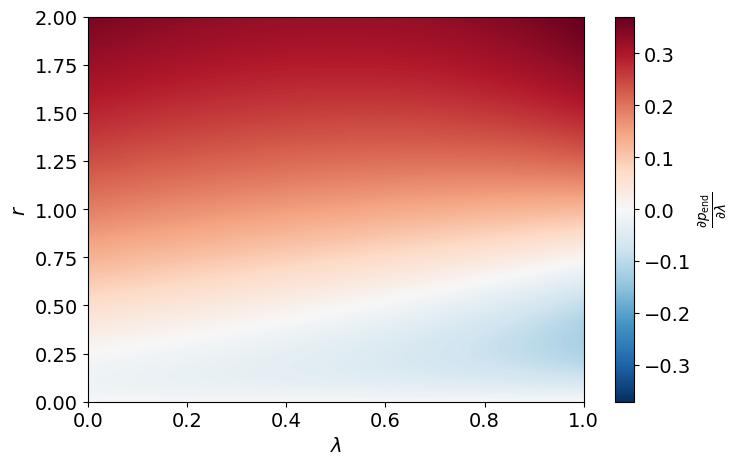

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

font = {#'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
# Grid
lam_grid = np.linspace(0.0, 1.0, 401)
r_grid = np.linspace(0.0, 2.0, 401)
L, Rg = np.meshgrid(lam_grid, r_grid)

# Value heatmap for x_end
Z = x_end(Rg, L)
Z = np.clip(Z, 0, 1)  # guard tiny numeric wiggles

# plt.figure(figsize=(8, 5))
# plt.imshow(Z, origin='lower', extent=[lam_grid.min(), lam_grid.max(), r_grid.min(), r_grid.max()], aspect='auto')
# plt.xlabel(r'$\lambda$')
# plt.ylabel(r'$r$')
# plt.title(r'Fixation probability from an END on $P_3$: $x_{\mathrm{end}}(r,\lambda)$')
# plt.colorbar(label='x_end')
# plt.tight_layout()
# plt.show()

# Derivative heatmap d/d lambda of x_end
# Central differences in lambda
h = 1e-4
Zp = x_end(Rg, np.minimum(1.0, L + h))
Zm = x_end(Rg, np.maximum(0.0, L - h))
dZ = (Zp - Zm) / (np.minimum(1.0, L + h) - np.maximum(0.0, L - h))

vmax = np.nanmax(np.abs(dZ))
f = plt.figure(figsize=(8, 5))
im = plt.imshow(dZ, origin='lower', extent=[lam_grid.min(), lam_grid.max(), r_grid.min(), r_grid.max()],
            aspect='auto', vmin=-vmax, vmax=vmax, cmap='RdBu_r')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$r$')
# plt.title(r'$\partial x_{\mathrm{end}}/\partial \lambda$ on $P_3$ (blue=decrease, red=increase)')
plt.colorbar(im, label=r'$\frac{\partial p_{\mathrm{end}}}{\partial \lambda}$')
# plt.tight_layout()
# plt.show()
# plt.draw()
# fig1 = plt.gcf()

In [12]:
f.savefig('pics/derivative-n3-star.png', dpi=300, bbox_inches='tight')